# ML Model : Preduct Credit Card User is Bad or Good Client

In [1]:
## Import necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
%config InlineBackend.figure_format = 'svg'

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## set display 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
%config InlineBackend.figure_format = 'svg'

In [3]:
## load application_record dataset

application = pd.read_csv('application_record.csv')
application.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

In [4]:
## load credir_record dataset

credit = pd.read_csv('credit_record.csv')
credit.head()

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

In [5]:
## merge both datasets

df = application.merge(credit, how='inner', on='ID')
df

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008804           M            Y               Y             0   
2       5008804           M            Y               Y             0   
3       5008804           M            Y               Y             0   
4       5008804           M            Y               Y             0   
...         ...         ...          ...             ...           ...   
777710  5150337           M            N               Y             0   
777711  5150337           M            N               Y             0   
777712  5150337           M            N               Y             0   
777713  5150337           M            N               Y             0   
777714  5150337           M            N               Y             0   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0          Working               Higher education   
1               427500.0          Working               Higher education   
2               427500.0          Working               Higher education   
3               427500.0          Working               Higher education   
4               427500.0          Working               Higher education   
...                  ...              ...                            ...   
777710          112500.0          Working  Secondary / secondary special   
777711          112500.0          Working  Secondary / secondary special   
777712          112500.0          Working  Secondary / secondary special   
777713          112500.0          Working  Secondary / secondary special   
777714          112500.0          Working  Secondary / secondary special   

          NAME_FAMILY_STATUS NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage  Rented apartment      -12005          -4542   
1             Civil marriage  Rented apartment      -12005          -4542   
2             Civil marriage  Rented apartment      -12005          -4542   
3             Civil marriage  Rented apartment      -12005          -4542   
4             Civil marriage  Rented apartment      -12005          -4542   
...                      ...               ...         ...            ...   
777710  Single / not married  Rented apartment       -9188          -1193   
777711  Single / not married  Rented apartment       -9188          -1193   
777712  Single / not married  Rented apartment       -9188          -1193   
777713  Single / not married  Rented apartment       -9188          -1193   
777714  Single / not married  Rented apartment       -9188          -1193   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                1                1           0           0             NaN   
1                1                1           0           0             NaN   
2                1                1           0           0             NaN   
3                1                1           0           0             NaN   
4                1                1           0           0             NaN   
...            ...              ...         ...         ...             ...   
777710           1                0           0           0        Laborers   
777711           1                0           0           0        Laborers   
777712           1                0           0           0        Laborers   
777713           1                0           0           0        Laborers   
777714           1                0           0           0        Laborers   

        CNT_FAM_MEMBERS  MONTHS_BALANCE STATUS  
0                   2.0               0      C  
1                   2.0              -1      C  
2                   2.0              -2      C  
3                   2.0              -3      C  
4                   2.0              -4      C  
...                 ...             ...    

In [6]:
## check null values column wise
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [7]:
## filling null values of 'OCCUPATIO' column with 'Unknown' make it permanent change
df.OCCUPATION_TYPE.fillna("Unknown", inplace=True)

In [8]:
df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

In [9]:
## check Non-Null Count and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [10]:
## fetch 10 random record from dataset(df) 
df.sample(10)

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
724871  5143317           F            N               N             1   
723644  5143259           F            N               Y             0   
88359   5024083           F            N               Y             0   
573995  5113496           F            N               Y             1   
323082  5061977           F            N               Y             0   
45432   5021535           M            N               Y             0   
75117   5023273           F            N               Y             0   
116235  5028450           F            Y               Y             0   
755761  5149474           F            Y               Y             1   
138384  5029698           M            N               Y             1   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
724871           67500.0  Commercial associate  Secondary / secondary special   
723644          157500.0             Pensioner  Secondary / secondary special   
88359           157500.0             Pensioner  Secondary / secondary special   
573995          135000.0  Commercial associate              Incomplete higher   
323082          135000.0               Working               Higher education   
45432            67500.0             Pensioner  Secondary / secondary special   
75117            76500.0             Pensioner  Secondary / secondary special   
116235          206100.0             Pensioner  Secondary / secondary special   
755761          135000.0  Commercial associate               Higher education   
138384          202500.0               Working               Higher education   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
724871            Married  House / apartment      -11306          -2053   
723644            Married  House / apartment      -20578         365243   
88359           Separated  House / apartment      -18865         365243   
573995            Married  House / apartment       -9734          -2049   
323082            Married  House / apartment      -13299          -1628   
45432             Married  House / apartment      -22917         365243   
75117               Widow  House / apartment      -25140         365243   
116235            Married  House / apartment      -20296         365243   
755761            Married  House / apartment      -11278          -2481   
138384          Separated  House / apartment      -18085          -1205   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
724871           1                0           0           0     Sales staff   
723644           1                0           1           0         Unknown   
88359            1                0           0           0         Unknown   
573995           1                1           1           1      Core staff   
323082           1                0           0           0        Laborers   
45432            1                0           0           0         Unknown   
75117            1                0           0           0         Unknown   
116235           1                0           1           0         Unknown   
755761           1                0           0           0         Unknown   
138384           1                0           0           0  Security staff   

        CNT_FAM_MEMBERS  MONTHS_BALANCE STATUS  
724871              3.0              -2      0  
723644              2.0              -5      0  
88359               1.0             -31      C  
573995              3.0              -7      0  
323082              2.0               0      C  
45432               2.0             -10      C  
75117               1.0             -22      X  
116235              2.0             -25      X  
755761              3.0             -38      C  
138384              2.0             -18      C

### Status
##### 0: 1-29 days past due 
##### 1: 30-59 days past due 
##### 2: 60-89 days overdue 
##### 3: 90-119 days overdue 
##### 4: 120-149 days overdue 
##### 5: Overdue or bad debts, write-offs for more than 150 days 
##### C: paid off that month 
##### X: No loan for the month

In [11]:
## replace 'STATUS' column's categorical data into integer

df['STATUS'] = df['STATUS'].replace(['C','X',0,1,2,3,4,5],[-1,-2,0,1,2,3,4,5])
df

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008804           M            Y               Y             0   
2       5008804           M            Y               Y             0   
3       5008804           M            Y               Y             0   
4       5008804           M            Y               Y             0   
...         ...         ...          ...             ...           ...   
777710  5150337           M            N               Y             0   
777711  5150337           M            N               Y             0   
777712  5150337           M            N               Y             0   
777713  5150337           M            N               Y             0   
777714  5150337           M            N               Y             0   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0          Working               Higher education   
1               427500.0          Working               Higher education   
2               427500.0          Working               Higher education   
3               427500.0          Working               Higher education   
4               427500.0          Working               Higher education   
...                  ...              ...                            ...   
777710          112500.0          Working  Secondary / secondary special   
777711          112500.0          Working  Secondary / secondary special   
777712          112500.0          Working  Secondary / secondary special   
777713          112500.0          Working  Secondary / secondary special   
777714          112500.0          Working  Secondary / secondary special   

          NAME_FAMILY_STATUS NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage  Rented apartment      -12005          -4542   
1             Civil marriage  Rented apartment      -12005          -4542   
2             Civil marriage  Rented apartment      -12005          -4542   
3             Civil marriage  Rented apartment      -12005          -4542   
4             Civil marriage  Rented apartment      -12005          -4542   
...                      ...               ...         ...            ...   
777710  Single / not married  Rented apartment       -9188          -1193   
777711  Single / not married  Rented apartment       -9188          -1193   
777712  Single / not married  Rented apartment       -9188          -1193   
777713  Single / not married  Rented apartment       -9188          -1193   
777714  Single / not married  Rented apartment       -9188          -1193   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                1                1           0           0         Unknown   
1                1                1           0           0         Unknown   
2                1                1           0           0         Unknown   
3                1                1           0           0         Unknown   
4                1                1           0           0         Unknown   
...            ...              ...         ...         ...             ...   
777710           1                0           0           0        Laborers   
777711           1                0           0           0        Laborers   
777712           1                0           0           0        Laborers   
777713           1                0           0           0        Laborers   
777714           1                0           0           0        Laborers   

        CNT_FAM_MEMBERS  MONTHS_BALANCE STATUS  
0                   2.0               0     -1  
1                   2.0              -1     -1  
2                   2.0              -2     -1  
3                   2.0              -3     -1  
4                   2.0              -4     -1  
...                 ...             ...    

In [12]:
## category wise values in 'STATUS' column
df['STATUS'].value_counts()

-1    329536
0     290654
-2    145950
1       8747
5       1527
2        801
3        286
4        214
Name: STATUS, dtype: int64

In [13]:
## change datatype of 'STATUS' column to 'int'
df['STATUS'] = df['STATUS'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

## PERFORM EDA ON IMPORTANT FEATURES

In [15]:
## 'FLAG_OWN_CAR' column
 
car = df.groupby('FLAG_OWN_CAR').FLAG_OWN_CAR.count()
car

FLAG_OWN_CAR
N    473355
Y    304360
Name: FLAG_OWN_CAR, dtype: int64

In [16]:
## Bar plot of 'FLAG_OWN_CAR' column's category

df.groupby('FLAG_OWN_CAR').FLAG_OWN_CAR.count().plot.bar(ylim=0,color='red')
plt.title("Bar Plot of FLAG_OWN_CAR Column's category")
plt.xlabel("Car Own Flag : Yes or No ")
plt.ylabel("Value Count")
plt.show()

In [17]:
## 'FLAG_OWN_REALTY' Column's category wise count

land = df.groupby('FLAG_OWN_REALTY').FLAG_OWN_REALTY.count()
land

FLAG_OWN_REALTY
N    264767
Y    512948
Name: FLAG_OWN_REALTY, dtype: int64

In [18]:
## Bar Plot of FLAG_OWN_REALTY Column's category 

df.groupby('FLAG_OWN_REALTY').FLAG_OWN_REALTY.count().plot.bar(ylim=0,color='green')

plt.title("Bar Plot of FLAG_OWN_REALTY Column's category")
plt.xlabel("FLAG_OWN_REALTY : Yes or No ")
plt.ylabel("Value Count")
plt.show()

In [19]:
## 'NAME_INCOME_TYPE' Column's category wise count

income = df.groupby('NAME_INCOME_TYPE').NAME_INCOME_TYPE.count()
income

NAME_INCOME_TYPE
Commercial associate    183385
Pensioner               128392
State servant            65437
Student                    337
Working                 400164
Name: NAME_INCOME_TYPE, dtype: int64

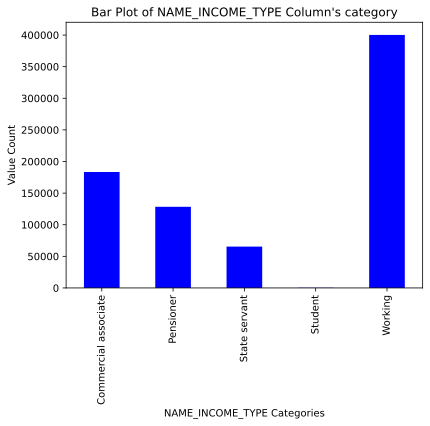

In [20]:
## Bar Plot of NAME_INCOME_TYPE Column's category 

df.groupby('NAME_INCOME_TYPE').NAME_INCOME_TYPE.count().plot.bar(ylim=0,color='blue')

plt.title("Bar Plot of NAME_INCOME_TYPE Column's category")
plt.xlabel("NAME_INCOME_TYPE Categories")
plt.ylabel("Value Count")
plt.show()

In [21]:
## convert data type of 'CNT_FAM_MEMBERS' column to 'int'
df.CNT_FAM_MEMBERS = df.CNT_FAM_MEMBERS.astype(int)

## ## 'CNT_FAM_MEMBERS' Column's category wise count
family = df.groupby('CNT_FAM_MEMBERS').CNT_FAM_MEMBERS.count()
family

CNT_FAM_MEMBERS
1     141477
2     423723
3     134894
4      66990
5       8999
6       1196
7        273
9         46
15       111
20         6
Name: CNT_FAM_MEMBERS, dtype: int64

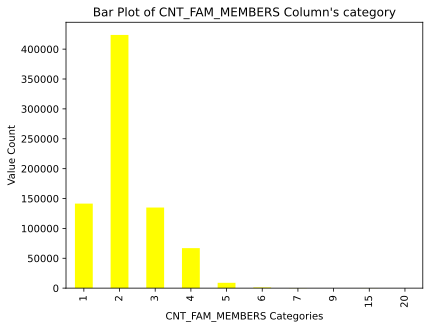

In [22]:
## Bar Plot of CNT_FAM_MEMBERS Column's category 

df.groupby('CNT_FAM_MEMBERS').CNT_FAM_MEMBERS.count().plot.bar(ylim=0,color='yellow')

plt.title("Bar Plot of CNT_FAM_MEMBERS Column's category")
plt.xlabel("CNT_FAM_MEMBERS Categories")
plt.ylabel("Value Count")
plt.show()

## Calculate frequency of categories of columns w.r.t 'STATUS' column

In [23]:
## 'DAYS_EMPLOYED' Column

df.groupby(['STATUS','DAYS_EMPLOYED'])['DAYS_EMPLOYED'].count()

STATUS  DAYS_EMPLOYED
-2      -15713             1
        -15661            22
        -15227             1
        -15072            14
        -15038           107
                        ... 
 5      -166               9
        -140               7
        -137               2
        -134               2
         365243          266
Name: DAYS_EMPLOYED, Length: 11652, dtype: int64

In [24]:
## 'NAME_HOUSING_TYPE' Column

df.groupby(['STATUS','NAME_HOUSING_TYPE'])['NAME_HOUSING_TYPE'].count()

STATUS  NAME_HOUSING_TYPE  
-2      Co-op apartment          1080
        House / apartment      129824
        Municipal apartment      4789
        Office apartment         1306
        Rented apartment         2180
        With parents             6771
-1      Co-op apartment          1328
        House / apartment      296473
        Municipal apartment     10103
        Office apartment         2199
        Rented apartment         4428
        With parents            15005
 0      Co-op apartment          1188
        House / apartment      260627
        Municipal apartment      9319
        Office apartment         2009
        Rented apartment         4118
        With parents            13393
 1      Co-op apartment            29
        House / apartment        7758
        Municipal apartment       280
        Office apartment           92
        Rented apartment          127
        With parents              461
 2      Co-op apartment             9
        House / apartm

In [25]:
## 'FLAG_OWN_REALTY' Column

df.groupby(['STATUS','FLAG_OWN_REALTY'])['FLAG_OWN_REALTY'].count()

STATUS  FLAG_OWN_REALTY
-2      N                   50494
        Y                   95456
-1      N                  111673
        Y                  217863
 0      N                   98242
        Y                  192412
 1      N                    3368
        Y                    5379
 2      N                     333
        Y                     468
 3      N                     125
        Y                     161
 4      N                      85
        Y                     129
 5      N                     447
        Y                    1080
Name: FLAG_OWN_REALTY, dtype: int64

In [26]:
## 'NAME_EDUCATION_TYPE' Column

df.groupby(['STATUS','NAME_EDUCATION_TYPE'])['NAME_EDUCATION_TYPE'].count()

STATUS  NAME_EDUCATION_TYPE          
-2      Academic degree                     147
        Higher education                  43063
        Incomplete higher                  5143
        Lower secondary                    1531
        Secondary / secondary special     96066
-1      Academic degree                     474
        Higher education                  90177
        Incomplete higher                 13282
        Lower secondary                    4237
        Secondary / secondary special    221366
 0      Academic degree                     208
        Higher education                  77192
        Incomplete higher                 11241
        Lower secondary                    2708
        Secondary / secondary special    199305
 1      Academic degree                       8
        Higher education                   2264
        Incomplete higher                   535
        Lower secondary                     112
        Secondary / secondary special      5828
 2

In [27]:
## 'OCCUPATION_TYPE' Column

df.groupby(['STATUS','OCCUPATION_TYPE'])['OCCUPATION_TYPE'].count()

STATUS  OCCUPATION_TYPE      
-2      Accountants                5283
        Cleaning staff             1915
        Cooking staff              2760
        Core staff                15189
        Drivers                    9693
        HR staff                    169
        High skill tech staff      6484
        IT staff                    115
        Laborers                  25211
        Low-skill Laborers          497
        Managers                  13273
        Medicine staff             4294
        Private service staff      1432
        Realty agents               189
        Sales staff               12752
        Secretaries                 570
        Security staff             1910
        Unknown                   43783
        Waiters/barmen staff        431
-1      Accountants               11778
        Cleaning staff             4902
        Cooking staff              4910
        Core staff                32043
        Drivers                   19772
        HR

In [28]:
## 'FLAG_OWN_CAR' Column

df.groupby(['STATUS','FLAG_OWN_CAR'])['FLAG_OWN_CAR'].count()

STATUS  FLAG_OWN_CAR
-2      N                87232
        Y                58718
-1      N               202304
        Y               127232
 0      N               176615
        Y               114039
 1      N                 5504
        Y                 3243
 2      N                  487
        Y                  314
 3      N                  174
        Y                  112
 4      N                  135
        Y                   79
 5      N                  904
        Y                  623
Name: FLAG_OWN_CAR, dtype: int64

In [29]:
## 'NAME_INCOME_TYPE' Column

df.groupby(['STATUS','NAME_INCOME_TYPE'])['NAME_INCOME_TYPE'].count()

STATUS  NAME_INCOME_TYPE    
-2      Commercial associate     34523
        Pensioner                23539
        State servant            12422
        Student                     69
        Working                  75397
-1      Commercial associate     76295
        Pensioner                55355
        State servant            27484
        Student                    200
        Working                 170202
 0      Commercial associate     69302
        Pensioner                47731
        State servant            24639
        Student                     67
        Working                 148915
 1      Commercial associate      2368
        Pensioner                 1157
        State servant              767
        Student                      1
        Working                   4454
 2      Commercial associate       187
        Pensioner                  173
        State servant               39
        Working                    402
 3      Commercial associate       

In [30]:
## 'CODE_GENDER' Column

df.groupby(['STATUS','CODE_GENDER'])['CODE_GENDER'].count()

STATUS  CODE_GENDER
-2      F               95278
        M               50672
-1      F              221456
        M              108080
 0      F              194962
        M               95692
 1      F                5530
        M                3217
 2      F                 510
        M                 291
 3      F                 178
        M                 108
 4      F                 128
        M                  86
 5      F                 809
        M                 718
Name: CODE_GENDER, dtype: int64

In [31]:
## check statistic of numerical columns

df.describe()

ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  7.777150e+05  777715.000000      7.777150e+05  777715.000000   
mean   5.078743e+06       0.428082      1.885348e+05  -16124.937046   
std    4.180442e+04       0.745755      1.016225e+05    4104.304018   
min    5.008804e+06       0.000000      2.700000e+04  -25152.000000   
25%    5.044568e+06       0.000000      1.215000e+05  -19453.000000   
50%    5.069530e+06       0.000000      1.620000e+05  -15760.000000   
75%    5.115551e+06       1.000000      2.250000e+05  -12716.000000   
max    5.150487e+06      19.000000      1.575000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
count  777715.000000    777715.0    777715.000000  777715.000000   
mean    57775.825016         1.0         0.231818       0.300965   
std    136471.735391         0.0         0.421993       0.458678   
min    -15713.000000         1.0         0.000000       0.000000   
25%     -3292.000000         1.0         0.000000       0.000000   
50%     -1682.000000         1.0         0.000000       0.000000   
75%      -431.000000         1.0         0.000000       1.000000   
max    365243.000000         1.0         1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  MONTHS_BALANCE         STATUS  
count  777715.000000    777715.000000   777715.000000  777715.000000  
mean        0.091675         2.208837      -19.373564      -0.773726  
std         0.288567         0.907380       14.082208       0.804922  
min         0.000000         1.000000      -60.000000      -2.000000  
25%         0.000000         2.000000      -29.000000      -1.000000  
50%         0.000000         2.000000      -17.000000      -1.000000  
75%         0.000000         3.000000       -8.000000       0.000000  
max         1.000000        20.000000        0.000000       5.000000

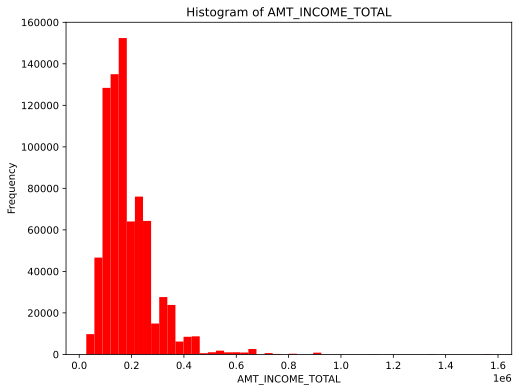

In [32]:
## Histogram plot of 'AMT_INCOME_TOTAL' column
plt.figure(figsize=(8,6))
df['AMT_INCOME_TOTAL'].plot(kind='hist',color='red',bins=50)
plt.title('Histogram of AMT_INCOME_TOTAL')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Frequency')
plt.show()

In [33]:
## pie plot of 'STATUS' Column

label = df['STATUS'].value_counts().index
value = df['STATUS'].value_counts().values

plt.figure(figsize=(8,6))
plt.pie(value, labels=label, autopct='%1.2f%%')
plt.title('STATUS : Category Wise Distribution')
plt.legend()
plt.show()

## Based on the above EDA, we create some columns to Label Dataset

#### Create 'INCOME' Column

In [34]:
df['INCOME'] = 0

In [35]:
income = []

for i in range(len(df)):
    if df.NAME_INCOME_TYPE[i] == "Pensioner" or df.NAME_INCOME_TYPE[i] == "Student":
        value = 0
    else:
        value = 1
    income.append(value)

df.INCOME = pd.DataFrame(income)
df.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008804           M            Y               Y             0   
2  5008804           M            Y               Y             0   
3  5008804           M            Y               Y             0   
4  5008804           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          427500.0          Working    Higher education     Civil marriage   
1          427500.0          Working    Higher education     Civil marriage   
2          427500.0          Working    Higher education     Civil marriage   
3          427500.0          Working    Higher education     Civil marriage   
4          427500.0          Working    Higher education     Civil marriage   

  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
0  Rented apartment      -12005          -4542           1                1   
1  Rented apartment      -12005          -4542           1                1   
2  Rented apartment      -12005          -4542           1                1   
3  Rented apartment      -12005          -4542           1                1   
4  Rented apartment      -12005          -4542           1                1   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  \
0           0           0         Unknown                2               0   
1           0           0         Unknown                2              -1   
2           0           0         Unknown                2              -2   
3           0           0         Unknown                2              -3   
4           0           0         Unknown                2              -4   

   STATUS  INCOME  
0      -1       1  
1      -1       1  
2      -1       1  
3      -1       1  
4      -1       1

#### Create 'OCCUPATION' Column

In [36]:
## make new column occupation

df['OCCUPATION'] = 0

In [37]:
OCCUPATION = []

for i in range(len(df)):
    if df.OCCUPATION_TYPE[i] == "Unknown":
        value = 0
    else:
        value = 1
    OCCUPATION.append(value)

df.OCCUPATION = OCCUPATION
df.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008804           M            Y               Y             0   
2  5008804           M            Y               Y             0   
3  5008804           M            Y               Y             0   
4  5008804           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          427500.0          Working    Higher education     Civil marriage   
1          427500.0          Working    Higher education     Civil marriage   
2          427500.0          Working    Higher education     Civil marriage   
3          427500.0          Working    Higher education     Civil marriage   
4          427500.0          Working    Higher education     Civil marriage   

  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
0  Rented apartment      -12005          -4542           1                1   
1  Rented apartment      -12005          -4542           1                1   
2  Rented apartment      -12005          -4542           1                1   
3  Rented apartment      -12005          -4542           1                1   
4  Rented apartment      -12005          -4542           1                1   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  \
0           0           0         Unknown                2               0   
1           0           0         Unknown                2              -1   
2           0           0         Unknown                2              -2   
3           0           0         Unknown                2              -3   
4           0           0         Unknown                2              -4   

   STATUS  INCOME  OCCUPATION  
0      -1       1           0  
1      -1       1           0  
2      -1       1           0  
3      -1       1           0  
4      -1       1           0

#### Create 'PROPERTY' Column

In [38]:
## perform feature engineering and make a new colum 'PROPERTY'

df['PROPERTY'] = 0

In [39]:
## give labels to 'PROPERTY' column : 'FLAG_OWN_CAR' and 'FLAG_OWN_REALTY' as 'Y' to '1' and remaning to '0'

property = []

for i in range(len(df)):
    if df.FLAG_OWN_CAR[i] == "Y" or df.FLAG_OWN_REALTY[i] == "Y":
        value = 1
    else:
        value = 0
    property.append(value)

df.PROPERTY = property
df.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008804           M            Y               Y             0   
2  5008804           M            Y               Y             0   
3  5008804           M            Y               Y             0   
4  5008804           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          427500.0          Working    Higher education     Civil marriage   
1          427500.0          Working    Higher education     Civil marriage   
2          427500.0          Working    Higher education     Civil marriage   
3          427500.0          Working    Higher education     Civil marriage   
4          427500.0          Working    Higher education     Civil marriage   

  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
0  Rented apartment      -12005          -4542           1                1   
1  Rented apartment      -12005          -4542           1                1   
2  Rented apartment      -12005          -4542           1                1   
3  Rented apartment      -12005          -4542           1                1   
4  Rented apartment      -12005          -4542           1                1   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  \
0           0           0         Unknown                2               0   
1           0           0         Unknown                2              -1   
2           0           0         Unknown                2              -2   
3           0           0         Unknown                2              -3   
4           0           0         Unknown                2              -4   

   STATUS  INCOME  OCCUPATION  PROPERTY  
0      -1       1           0         1  
1      -1       1           0         1  
2      -1       1           0         1  
3      -1       1           0         1  
4      -1       1           0         1

#### Create 'LABEL' Column

In [40]:
## Create a new column 'LABEL'
df['LABEL'] = 0

In [41]:
## assign labels to 'LABEL' column 

label = []

for i in range(len(df)):
    if df.STATUS[i] < 1 and df.INCOME[i] == 1 and df.PROPERTY[i] == 1:
        value = 1
    else:
        value = 0
    label.append(value)

df.LABEL = label
df.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008804           M            Y               Y             0   
2  5008804           M            Y               Y             0   
3  5008804           M            Y               Y             0   
4  5008804           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          427500.0          Working    Higher education     Civil marriage   
1          427500.0          Working    Higher education     Civil marriage   
2          427500.0          Working    Higher education     Civil marriage   
3          427500.0          Working    Higher education     Civil marriage   
4          427500.0          Working    Higher education     Civil marriage   

  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
0  Rented apartment      -12005          -4542           1                1   
1  Rented apartment      -12005          -4542           1                1   
2  Rented apartment      -12005          -4542           1                1   
3  Rented apartment      -12005          -4542           1                1   
4  Rented apartment      -12005          -4542           1                1   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  \
0           0           0         Unknown                2               0   
1           0           0         Unknown                2              -1   
2           0           0         Unknown                2              -2   
3           0           0         Unknown                2              -3   
4           0           0         Unknown                2              -4   

   STATUS  INCOME  OCCUPATION  PROPERTY  LABEL  
0      -1       1           0         1      1  
1      -1       1           0         1      1  
2      -1       1           0         1      1  
3      -1       1           0         1      1  
4      -1       1           0         1      1

In [42]:
## count 'Good Clients'

label_good = df.LABEL.sum()
label_good

506546

In [43]:
## percent of 'Good Clients' in dataset
label_good_percent = (label_good / len(df))*100
print(label_good_percent,'%')

65.13259998842764 %


In [44]:
## count 'Good' and 'Bad' clients
df.groupby('LABEL').LABEL.count()

LABEL
0    271169
1    506546
Name: LABEL, dtype: int64

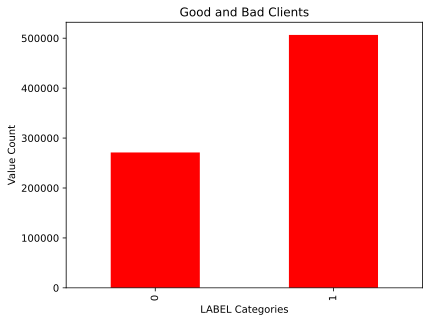

In [45]:
## Plot Bar graph of 'LABEL' column 

df.groupby('LABEL').LABEL.count().plot.bar(ylim=0,color='red')
plt.title("Good and Bad Clients")
plt.xlabel("LABEL Categories")
plt.ylabel("Value Count")
plt.show()

In [46]:
## check shape of dataset
df.shape

(777715, 24)

In [47]:
## make copy of cleaned dataset
df0 = df.copy()
df0.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008804           M            Y               Y             0   
2  5008804           M            Y               Y             0   
3  5008804           M            Y               Y             0   
4  5008804           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          427500.0          Working    Higher education     Civil marriage   
1          427500.0          Working    Higher education     Civil marriage   
2          427500.0          Working    Higher education     Civil marriage   
3          427500.0          Working    Higher education     Civil marriage   
4          427500.0          Working    Higher education     Civil marriage   

  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
0  Rented apartment      -12005          -4542           1                1   
1  Rented apartment      -12005          -4542           1                1   
2  Rented apartment      -12005          -4542           1                1   
3  Rented apartment      -12005          -4542           1                1   
4  Rented apartment      -12005          -4542           1                1   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  \
0           0           0         Unknown                2               0   
1           0           0         Unknown                2              -1   
2           0           0         Unknown                2              -2   
3           0           0         Unknown                2              -3   
4           0           0         Unknown                2              -4   

   STATUS  INCOME  OCCUPATION  PROPERTY  LABEL  
0      -1       1           0         1      1  
1      -1       1           0         1      1  
2      -1       1           0         1      1  
3      -1       1           0         1      1  
4      -1       1           0         1      1

In [68]:
## extract important features from dataframe

df_imp = df[['STATUS','INCOME','OCCUPATION','PROPERTY','LABEL']]
df_imp.head()

STATUS  INCOME  OCCUPATION  PROPERTY  LABEL
0      -1       1           0         1      1
1      -1       1           0         1      1
2      -1       1           0         1      1
3      -1       1           0         1      1
4      -1       1           0         1      1

## ML Model

In [69]:
## separate dataset as dependent and independent features

x = df_imp.drop(['LABEL'],axis=1)
y = df_imp['LABEL']

In [70]:
## train-test split
## test_size=25%

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.25, random_state=42)

In [71]:
## check shape 
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(583286, 4) (194429, 4)
(583286,) (194429,)


In [72]:
### random forest model

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier()

## Hyperparameter Tunning using GridSearchCV

In [53]:
from sklearn.model_selection import GridSearchCV

## parameters for hyperparameter tunning
parameters = {'n_estimators':(50,70,90,110),
             'criterion':('gini','entropy'),
             'max_depth':(3,5,7,9),
             'max_features':('auto','sqrt'),
             'min_samples_split':(2,4,6)
             }

In [54]:
## apply GridSearchCV
rfc_grid = GridSearchCV(RandomForestClassifier(n_jobs=-1, oob_score=False), param_grid=parameters, cv=3, verbose=True)

In [55]:
## trained model on different parameters
rfc_grid_model = rfc_grid.fit(x_train, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


In [56]:
## extract best estimators
rfc_grid_model.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=50, n_jobs=-1)

In [57]:
## find accuracy score of trained model
rfc_grid_model.best_score_

1.0

In [58]:
## Build Model with Best estimators
rfc_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                   max_depth=3, max_features='sqrt', max_leaf_nodes=None, 
                                  min_impurity_decrease=0.0,
                                  min_samples_leaf=1, min_samples_split=3,
                                  min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                                  oob_score=False, random_state=None, verbose=0,
                                  warm_start=False)

In [59]:
## finally training the model on the Best Estimators
rfc_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, max_features='sqrt', min_samples_split=3,
                       n_estimators=50, n_jobs=-1)

## Model Performance Evaluation on Test Data

In [60]:
## predict x_test 

y_pred = rfc_model.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [62]:
## Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67899
           1       1.00      1.00      1.00    126530

    accuracy                           1.00    194429
   macro avg       1.00      1.00      1.00    194429
weighted avg       1.00      1.00      1.00    194429



In [63]:
## Accuracy Score
acc = accuracy_score(y_test, y_pred)
print(acc)

1.0


In [64]:
## confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[ 67899      0]
 [     0 126530]]


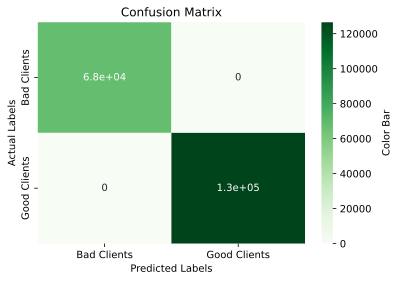

In [65]:
## confusion matrix

plt.figure(figsize=(6,4))

sns.heatmap(cm, cmap='Greens', annot=True,
           cbar_kws={'orientation':'vertical', 'label':'Color Bar'},
           xticklabels=['Bad Clients','Good Clients'], yticklabels=['Bad Clients','Good Clients'])

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [74]:
## dump trained classification model and dataframe to build streamlit app

import pickle

pickle.dump(rfc_model,open('rfc_model1.pkl','wb'))
pickle.dump(df_imp,open('df_imp1.pkl','wb'))
#pickle.dump(df,open('df.pkl','wb'))